In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from itertools import combinations
from inmoose.pycombat import pycombat_seq

# 1. Cleaning data

In [2]:
# Loading covariates matrix

messy_sample = pd.read_excel("messy_sample_sheet.xlsx")
messy_sample

,SID,Condition,Sex,Batch,PMI,RIN,Liver,BrainPH,BrainWeight,LeftRightBrain,Smoking
0,SRR15466722,Control,male,2.0,29,"4,9",MildSteatosis,6.12,1320,Left,Never
1,SRR15466723,Control,Female,1.0,15,7.3,Normal,6.93,1330,Right,NaN
2,SRR15466724,Control,female,2.0,11,3.4,Normal,6.21,1200,Left,Current
3,SRR15466725,AlcoholUseDisorder,female,1.0,38,7.8,Normal,6.54,1180,Right,Current
4,SRR15466742,Control,female,2.0,23,4.6,Congestion,6.17,1340,Left,NAN
5,SRR15466743,AlcoholUseDisorder,male,1.0,39.5,8,Cirrhosis,6.34,1412,Left,Current
6,SRR15466744,Control,femalle,1.0,29.5,8.2,Normal,6.78,1195,Left,Never
7,SRR15466745,AlcoholUseDisorder,female,2.0,37,"6,8",Steatosis,6.95,1139,Right,Never
8,SRR15466746,AlcoholUseDisorder,male,2.0,61,7.3,Steatosis,6.79,1670,Left,Current
9,SRR15466729,Control,male,1.0,12,7.6,Steatosis,6.39,1631,Left,Never


In [3]:
# Creating a copy of messy sample sheet where clean df will be stored

clean_sample = messy_sample.copy()

In [4]:
# Removing 22nd row because it doesn't hold any valuable info

clean_sample = clean_sample.drop(index = 22)

In [5]:
clean_sample["Condition"] = clean_sample["Condition"].replace("AlcoholUsedisorder", "AlcoholUseDisorder")

In [6]:
clean_sample["Batch"] = clean_sample["Batch"].apply(str)

In [7]:
# Cleaning up Sex column

print(set(messy_sample["Sex"]))
clean_sample["Sex"] = clean_sample["Sex"].replace(to_replace = [r'^m.*', r'^f.*'], value = ["Male", "Female"], regex = True)

{'Female', 'female', 'Male', 'male', 'Gender', 'femalle', 'f'}


In [8]:
# Checking type of each value in PMI column and changing every value to float

print(set(messy_sample["PMI"].apply(type)))
clean_sample["PMI"] = clean_sample["PMI"].apply(float)

{<class 'str'>, <class 'float'>, <class 'int'>}


In [9]:
# Checking the type of each value in RIN, making the delimiter even across all rows and changing type to float

print(set(messy_sample["RIN"].apply(type)))
clean_sample["RIN"] = clean_sample["RIN"].apply(lambda i: i.replace(',', '.') if isinstance(i, str) else i)
clean_sample["RIN"] = clean_sample["RIN"].apply(float)

{<class 'str'>, <class 'float'>, <class 'int'>}


In [10]:
# Cleaning Liver column

print(set(messy_sample["Liver"]))
clean_sample["Liver"] = clean_sample["Liver"].replace(to_replace = [r'^[Cc]ir.*', r'^[Cc]on.*', r'^[Nn]ormal', r'.*[Ss]teatosis.*'], value = ["Cirrhosis", "Congestion", "Normal", "Steatosis"], regex = True)

{'Cirrhosiss', 'Case', 'Congestion', 'Normal', 'Steatosis', 'Cirrhosis', 'MildSteatosis', 'normal', 'Steatosiss', 'Conkestion'}


In [11]:
# Nothing to change

print(set(messy_sample["BrainPH"].apply(type)))
clean_sample["BrainPH"] = clean_sample["BrainPH"].apply(float)

{<class 'str'>, <class 'float'>}


In [12]:
# Nothing to change

print(set(messy_sample["BrainWeight"].apply(type)))
clean_sample["BrainWeight"] = clean_sample["BrainWeight"].apply(float)

{<class 'str'>, <class 'int'>}


In [13]:
# Nothing to change

set(messy_sample["LeftRightBrain"])

{'Brain', 'Left', 'Right'}

In [14]:
print(set(messy_sample["Smoking"].apply(type)))

{<class 'str'>, <class 'float'>}


In [15]:
print(set(messy_sample["Smoking"]))
clean_sample["Smoking"] = clean_sample["Smoking"].replace(to_replace = [r'Ex_smoker.*', r'[Nn]ever', r'NAN'], value = ["Past", "Never", "Unknown"], regex = True)

{'Ex_smokers', 'Current', 'Status', 'NAN', 'Ex_smoker', nan, 'never', 'Never'}


In [16]:
clean_sample['Smoking'].fillna('Unknown', inplace=True)

In [17]:
clean_sample

,SID,Condition,Sex,Batch,PMI,RIN,Liver,BrainPH,BrainWeight,LeftRightBrain,Smoking
0,SRR15466722,Control,Male,2.0,29.0,4.9,Steatosis,6.12,1320.0,Left,Never
1,SRR15466723,Control,Female,1.0,15.0,7.3,Normal,6.93,1330.0,Right,Unknown
2,SRR15466724,Control,Female,2.0,11.0,3.4,Normal,6.21,1200.0,Left,Current
3,SRR15466725,AlcoholUseDisorder,Female,1.0,38.0,7.8,Normal,6.54,1180.0,Right,Current
4,SRR15466742,Control,Female,2.0,23.0,4.6,Congestion,6.17,1340.0,Left,Unknown
5,SRR15466743,AlcoholUseDisorder,Male,1.0,39.5,8.0,Cirrhosis,6.34,1412.0,Left,Current
6,SRR15466744,Control,Female,1.0,29.5,8.2,Normal,6.78,1195.0,Left,Never
7,SRR15466745,AlcoholUseDisorder,Female,2.0,37.0,6.8,Steatosis,6.95,1139.0,Right,Never
8,SRR15466746,AlcoholUseDisorder,Male,2.0,61.0,7.3,Steatosis,6.79,1670.0,Left,Current
9,SRR15466729,Control,Male,1.0,12.0,7.6,Steatosis,6.39,1631.0,Left,Never


In [18]:
# Saving df to csv file

clean_sample.to_csv('clean_sample.csv', index = False)

# 2. Summary statistics

In [19]:
clean_sample[["PMI", "RIN", "BrainPH", "BrainWeight"]].describe()

,PMI,RIN,BrainPH,BrainWeight
count,24.000000,24.000000,24.000000,24.000000
mean,34.291667,6.812500,6.582917,1382.375000
std,14.878432,1.324128,0.277731,177.702441
min,11.000000,3.400000,6.120000,1139.000000
25%,23.000000,6.375000,6.377500,1198.000000
50%,35.750000,7.250000,6.545000,1377.000000
75%,40.375000,7.725000,6.807500,1486.000000
max,62.000000,8.300000,6.950000,1724.000000


In [20]:
# Cheking for samples with low RIN value

clean_sample[["SID", "RIN"]].where(clean_sample["RIN"] < 6)

,SID,RIN
0,SRR15466722,4.9
1,NaN,NaN
2,SRR15466724,3.4
3,NaN,NaN
4,SRR15466742,4.6
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [21]:
clean_sample[["Condition", "Batch", "Liver", "LeftRightBrain", "Smoking"]].describe()

,Condition,Batch,Liver,LeftRightBrain,Smoking
count,24,24,24,24,24
unique,2,2,4,2,4
top,Control,2.0,Normal,Left,Current
freq,12,12,9,14,15


In [22]:
for c in ["Condition", "Batch", "Liver", "LeftRightBrain", "Smoking"]:
    print(clean_sample[c].value_counts(), "\n --------------")

Condition
Control               12
AlcoholUseDisorder    12
Name: count, dtype: int64 
 --------------
Batch
2.0    12
1.0    12
Name: count, dtype: int64 
 --------------
Liver
Normal        9
Steatosis     6
Cirrhosis     5
Congestion    4
Name: count, dtype: int64 
 --------------
LeftRightBrain
Left     14
Right    10
Name: count, dtype: int64 
 --------------
Smoking
Current    15
Never       5
Unknown     2
Past        2
Name: count, dtype: int64 
 --------------


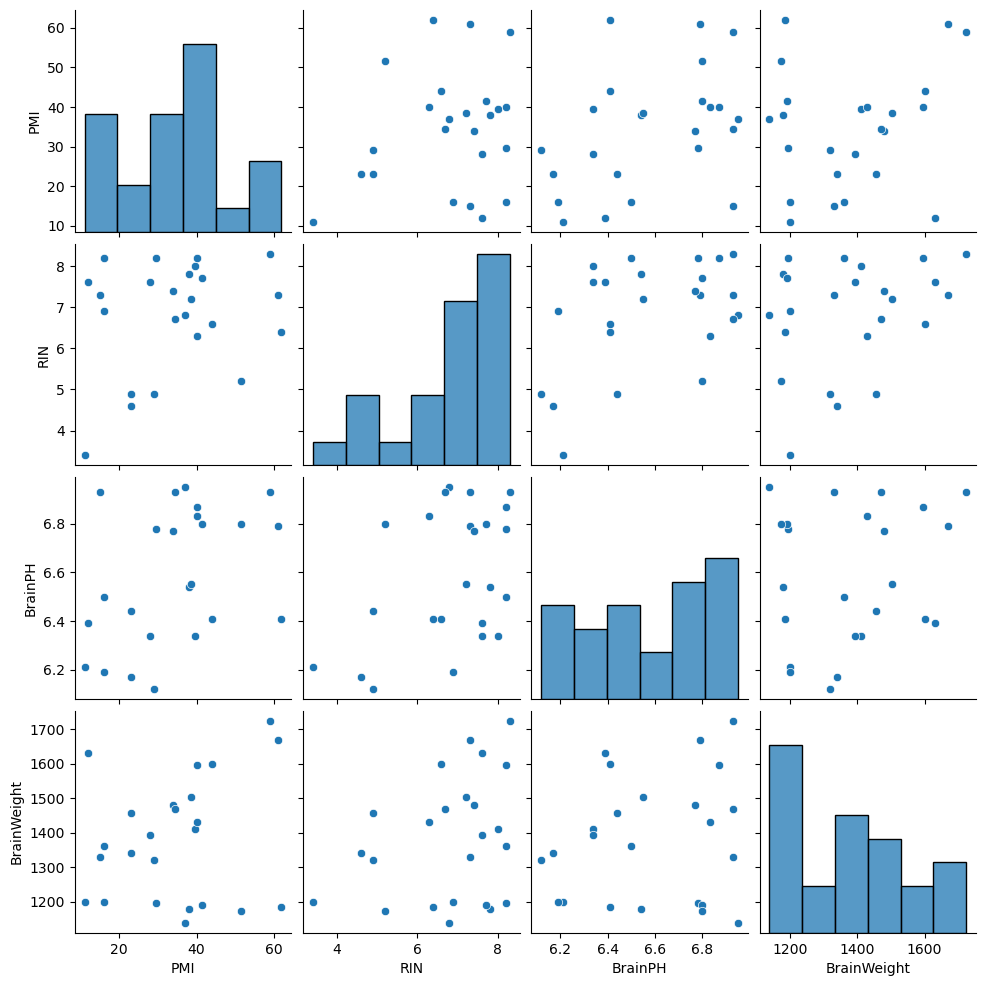

In [23]:
numeric_clean_sample = clean_sample[["PMI", "RIN", "BrainPH", "BrainWeight"]]

sns.pairplot(numeric_clean_sample, kind="scatter")
plt.savefig("pairplot.png")

In [24]:
# Loading gene expression matrix

gene_expression = pd.read_csv("rnaseq_default_counts.csv", header = 0, index_col = 0)
gene_expression

,SRR15466722,SRR15466723,SRR15466724,SRR15466725,SRR15466742,SRR15466743,SRR15466744,SRR15466745,SRR15466746,SRR15466729,...,SRR15466728,SRR15466733,SRR15466734,SRR15466735,SRR15466736,SRR15466737,SRR15466738,SRR15466739,SRR15466740,SRR15466741
ENSG00000000003,146,28,74,53,157,47,38,90,73,49,...,53,261,250,29,148,37,88,25,28,71
ENSG00000000005,1,2,0,4,0,2,2,2,4,0,...,1,2,5,0,1,1,3,0,0,3
ENSG00000000419,287,229,206,299,284,291,277,460,373,191,...,232,1030,723,211,390,180,397,229,159,399
ENSG00000000457,225,142,154,211,156,156,205,271,328,123,...,134,710,408,116,234,155,230,174,93,283
ENSG00000000460,59,81,52,57,59,49,64,92,62,35,...,35,200,139,42,62,49,70,57,21,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000292369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000292370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000292371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000292372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
gene_expression.shape

(62700, 24)

In [26]:
# No samples with genes not expressed

gene_expression.isnull().sum()

SRR15466722    0
SRR15466723    0
SRR15466724    0
SRR15466725    0
SRR15466742    0
SRR15466743    0
SRR15466744    0
SRR15466745    0
SRR15466746    0
SRR15466729    0
SRR15466731    0
SRR15466732    0
SRR15466726    0
SRR15466727    0
SRR15466728    0
SRR15466733    0
SRR15466734    0
SRR15466735    0
SRR15466736    0
SRR15466737    0
SRR15466738    0
SRR15466739    0
SRR15466740    0
SRR15466741    0
dtype: int64

In [27]:
# 14735 non expressed genes

print(len(np.where(gene_expression.sum(1) == 0)[0]))
non_expressed = list(np.where(gene_expression.sum(1) == 0)[0]) # weird output. example: np.int64(278)

14735


In [28]:
gene_expression.describe()

,SRR15466722,SRR15466723,SRR15466724,SRR15466725,SRR15466742,SRR15466743,SRR15466744,SRR15466745,SRR15466746,SRR15466729,...,SRR15466728,SRR15466733,SRR15466734,SRR15466735,SRR15466736,SRR15466737,SRR15466738,SRR15466739,SRR15466740,SRR15466741
count,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,...,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000,62700.000000
mean,200.923939,171.783828,190.850191,192.960973,166.847337,169.367337,195.648054,224.606443,232.287289,127.134163,...,128.131435,549.318309,356.738198,131.690893,236.490558,140.981579,198.311021,168.661643,117.951707,240.596730
std,2245.773752,1376.883021,2970.008221,1417.143116,2172.634783,1253.573092,1528.094740,1747.286819,1664.171391,948.316352,...,899.265977,3502.308145,2547.848827,1166.093374,2264.905161,1094.969196,1510.806912,1199.545988,938.471753,1832.480347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,32.000000,21.000000,27.000000,25.000000,28.000000,25.000000,26.000000,30.000000,29.000000,18.000000,...,20.000000,67.000000,54.000000,17.000000,33.000000,20.000000,27.000000,23.000000,16.000000,32.000000
max,304474.000000,156300.000000,449142.000000,194543.000000,290136.000000,157551.000000,199385.000000,261259.000000,180443.000000,127583.000000,...,108977.000000,331463.000000,305253.000000,169274.000000,291225.000000,152596.000000,183336.000000,151468.000000,121500.000000,209424.000000


Text(0, 0.5, 'Total reads per sample')

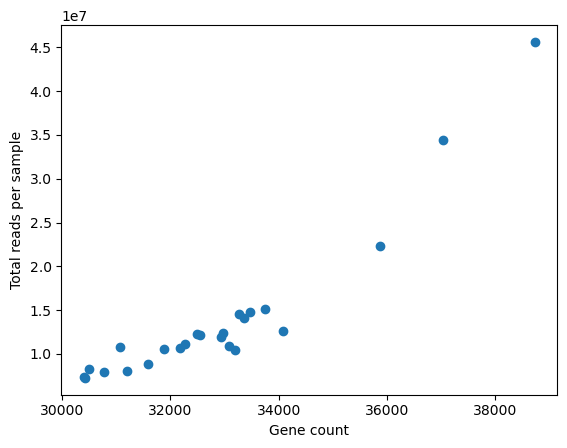

In [29]:
temp_df = gene_expression.sum(0).reset_index() # total reads per sample
temp_df.columns = ["SID", "CountPerSample"]
temp_df["GeneCount"] = (gene_expression > 0).sum().values # number of genes with non zero read count per sample 
temp_df

plt.scatter(temp_df["GeneCount"], temp_df["CountPerSample"])
plt.xlabel("Gene count")
plt.ylabel("Total reads per sample")


In [30]:
new_clean_sample = clean_sample.merge(temp_df, on = "SID", how = 'left')
new_clean_sample = new_clean_sample.sort_values(by = ["Batch", "Condition", "CountPerSample"], ascending = [True, False, False])
new_clean_sample

,SID,Condition,Sex,Batch,PMI,RIN,Liver,BrainPH,BrainWeight,LeftRightBrain,Smoking,CountPerSample,GeneCount
6,SRR15466744,Control,Female,1.0,29.5,8.2,Normal,6.78,1195.0,Left,Never,12267133,32490
1,SRR15466723,Control,Female,1.0,15.0,7.3,Normal,6.93,1330.0,Right,Unknown,10770846,31068
21,SRR15466739,Control,Male,1.0,59.0,8.3,Normal,6.93,1724.0,Right,Past,10575085,31874
19,SRR15466737,Control,Female,1.0,28.0,7.6,Normal,6.34,1394.0,Left,Current,8839545,31589
17,SRR15466735,Control,Male,1.0,34.0,7.4,Normal,6.77,1480.0,Left,Never,8257019,30496
9,SRR15466729,Control,Male,1.0,12.0,7.6,Steatosis,6.39,1631.0,Left,Never,7971312,30770
3,SRR15466725,AlcoholUseDisorder,Female,1.0,38.0,7.8,Normal,6.54,1180.0,Right,Current,12098653,32547
12,SRR15466726,AlcoholUseDisorder,Female,1.0,16.0,6.9,Cirrhosis,6.19,1199.0,Right,Current,10918751,33073
5,SRR15466743,AlcoholUseDisorder,Male,1.0,39.5,8.0,Cirrhosis,6.34,1412.0,Left,Current,10619332,32176
14,SRR15466728,AlcoholUseDisorder,Female,1.0,41.5,7.7,Cirrhosis,6.80,1191.0,Right,Current,8033841,31189


In [31]:
len(new_clean_sample)

24

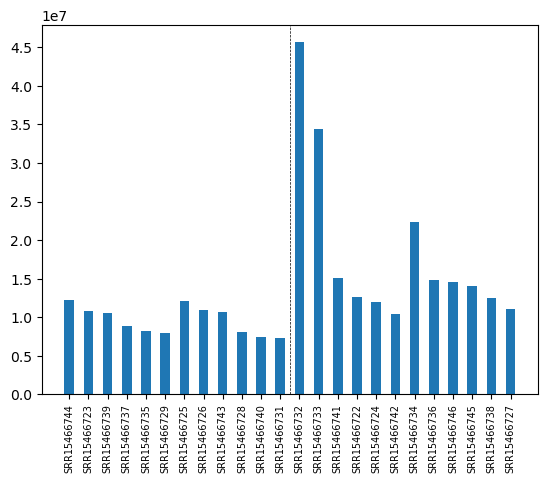

In [32]:
# cells = list(gene_expression.columns)
# count_per_cell = gene_expression.sum(0)

# temp_df = gene_expression.sum(0).reset_index
# temp_df.columns = ["SID", "CountPerSample"]

# clean_sample = clean_sample.merge(temp_df, on = "SID", how = 'left')

# batches = clean_sample[["SID", "Batch"]].set_index("SID").to_dict()["Batch"]
# color_map = {"1.0": "blue", "2.0": "orange"}

# bar_colors = [color_map[batches[col]] for col in cells]

# plt.bar(x = cells, height = count_per_cell, color = bar_colors)
# plt.xticks(rotation = 90, fontsize = 7)
# plt.yticks(np.arange(0, round(max(count_per_cell), -6), step = 5000000))
# plt.show()

#color_map = {"Normal": "blue", "Steatosis": "orange", "Cirrhosis": "green", "Congestion": "red"}
#bar_colors = [color_map[new_clean_sample[col]] for col in cells]

plt.bar(x = new_clean_sample["SID"], height = new_clean_sample["CountPerSample"], width = 0.5)

for i in range(1, len(new_clean_sample)):
    if new_clean_sample['Batch'].iloc[i] != new_clean_sample['Batch'].iloc[i - 1]:
        plt.axvline(x=i - 0.5, color='black', linestyle='--', linewidth = 0.5)

plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(np.arange(0, round(max(new_clean_sample["CountPerSample"]), -6), step = 5000000))
plt.show()

# sort by batches and color by different groups

In [33]:
# Filtering low-expressed genes:
print(len(np.where(gene_expression.sum(1) < 20)[0]))
low_expressed = list(map(int, np.where(gene_expression.sum(1) < 20)[0])) # indices of low expressed genes

filtered_gene_expression = gene_expression.drop(index = list(gene_expression.index[low_expressed])) # dropping low expressed genes
filtered_gene_expression.shape


30006


(32694, 24)

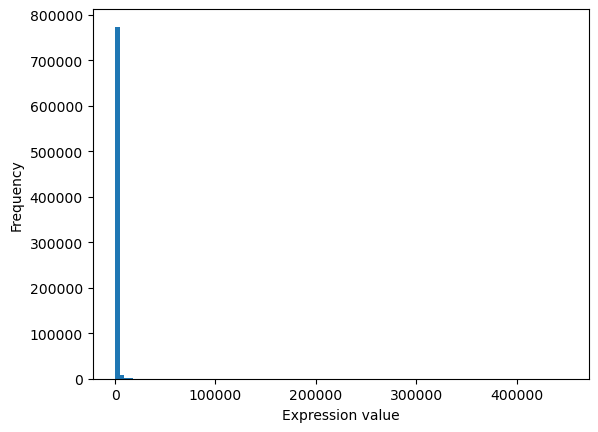

In [34]:
plt.hist(filtered_gene_expression.values.flatten(), bins=100)
plt.xlabel("Expression value")
plt.ylabel("Frequency")

plt.savefig("distribution.png")

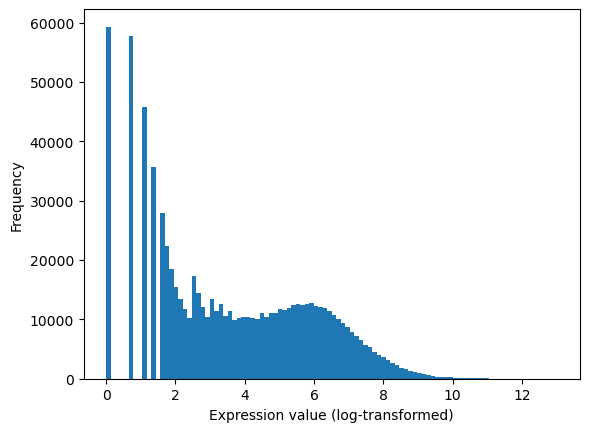

In [35]:
fge_log = np.log(filtered_gene_expression + 1)

plt.hist(fge_log.values.flatten(), bins=100)
plt.xlabel("Expression value (log-transformed)")
plt.ylabel("Frequency")

plt.savefig("distribution-log.png")

In [36]:
# Batch effect correction

fge_batch = list((clean_sample["Batch"].apply(float) - 1))
#print(clean_sample["SID"] == filtered_gene_expression.columns)
#print(filtered_gene_expression.columns)

fge_corrected = pycombat_seq(filtered_gene_expression, batch = fge_batch)

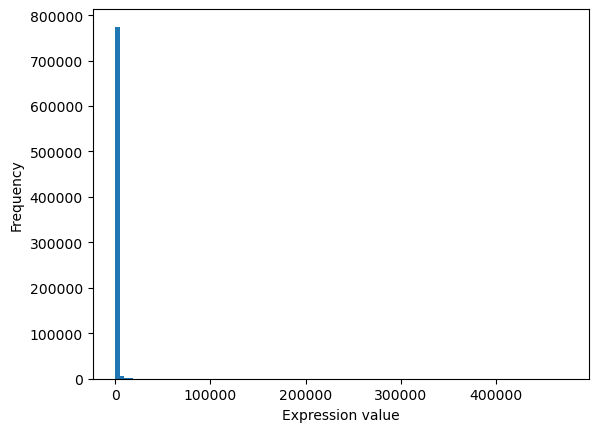

In [37]:
plt.hist(fge_corrected.values.flatten(), bins=100)
plt.xlabel("Expression value")
plt.ylabel("Frequency")

plt.savefig("distribution-corrected.png")

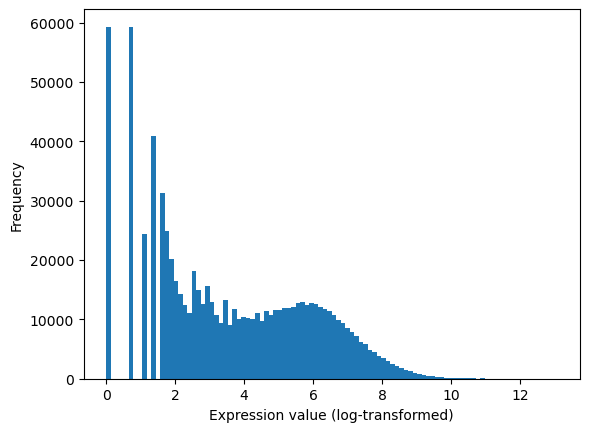

In [38]:
fge_corrected_log = np.log(fge_corrected + 1)

plt.hist(fge_corrected_log.values.flatten(), bins=100)
plt.xlabel("Expression value (log-transformed)")
plt.ylabel("Frequency")

plt.savefig("distribution-log-corrected.png")

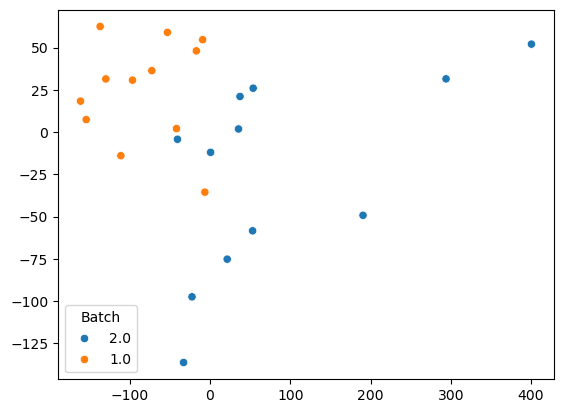

In [39]:
fge_log_transposed = fge_log.transpose()
scaler = preprocessing.StandardScaler().fit(fge_log_transposed)
fge_log_scaled = scaler.transform(fge_log_transposed)

fge_log_scaled.shape

pca = PCA() 
Y = pca.fit_transform(fge_log_scaled)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=clean_sample["Batch"])
plt.savefig("PCA-batch.png")

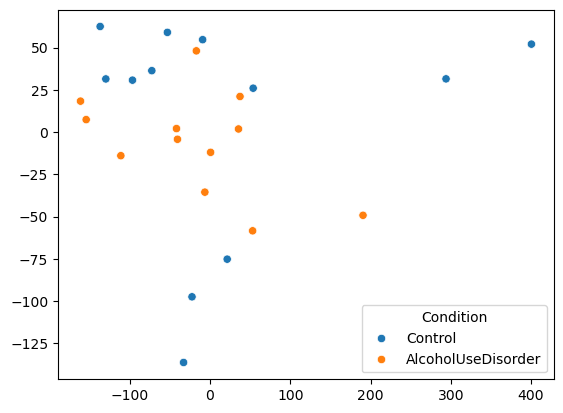

In [43]:
fge_log_transposed = fge_log.transpose()
scaler = preprocessing.StandardScaler().fit(fge_log_transposed)
fge_log_scaled = scaler.transform(fge_log_transposed)

fge_log_scaled.shape

pca = PCA() 
Y = pca.fit_transform(fge_log_scaled)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=clean_sample["Condition"])
plt.savefig("PCA-condition.png")

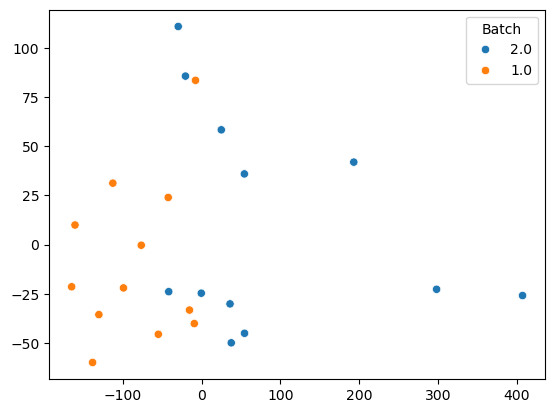

In [44]:
fge_cor_log_transposed = fge_corrected_log.transpose()
scaler = preprocessing.StandardScaler().fit(fge_cor_log_transposed)
fge_cor_log_scaled = scaler.transform(fge_cor_log_transposed)

fge_cor_log_scaled.shape

pca = PCA() 
Y = pca.fit_transform(fge_cor_log_scaled)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=clean_sample["Batch"])
plt.savefig("PCA-corrected-batch.png")

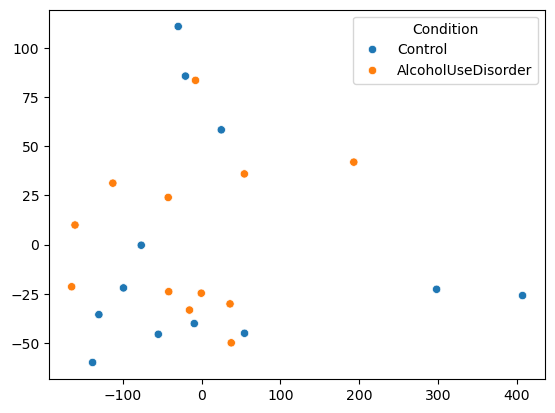

In [45]:
fge_cor_log_t = fge_corrected_log.transpose()
scaler = preprocessing.StandardScaler().fit(fge_cor_log_t)
fge_cor_log_scaled = scaler.transform(fge_cor_log_t)

pca = PCA() 
Y = pca.fit_transform(fge_cor_log_scaled)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=clean_sample["Condition"])
plt.savefig("PCA-corrected-condition.png")